# Spain Electricity Shortfall Regression Predict

© Explore Data Science Academy

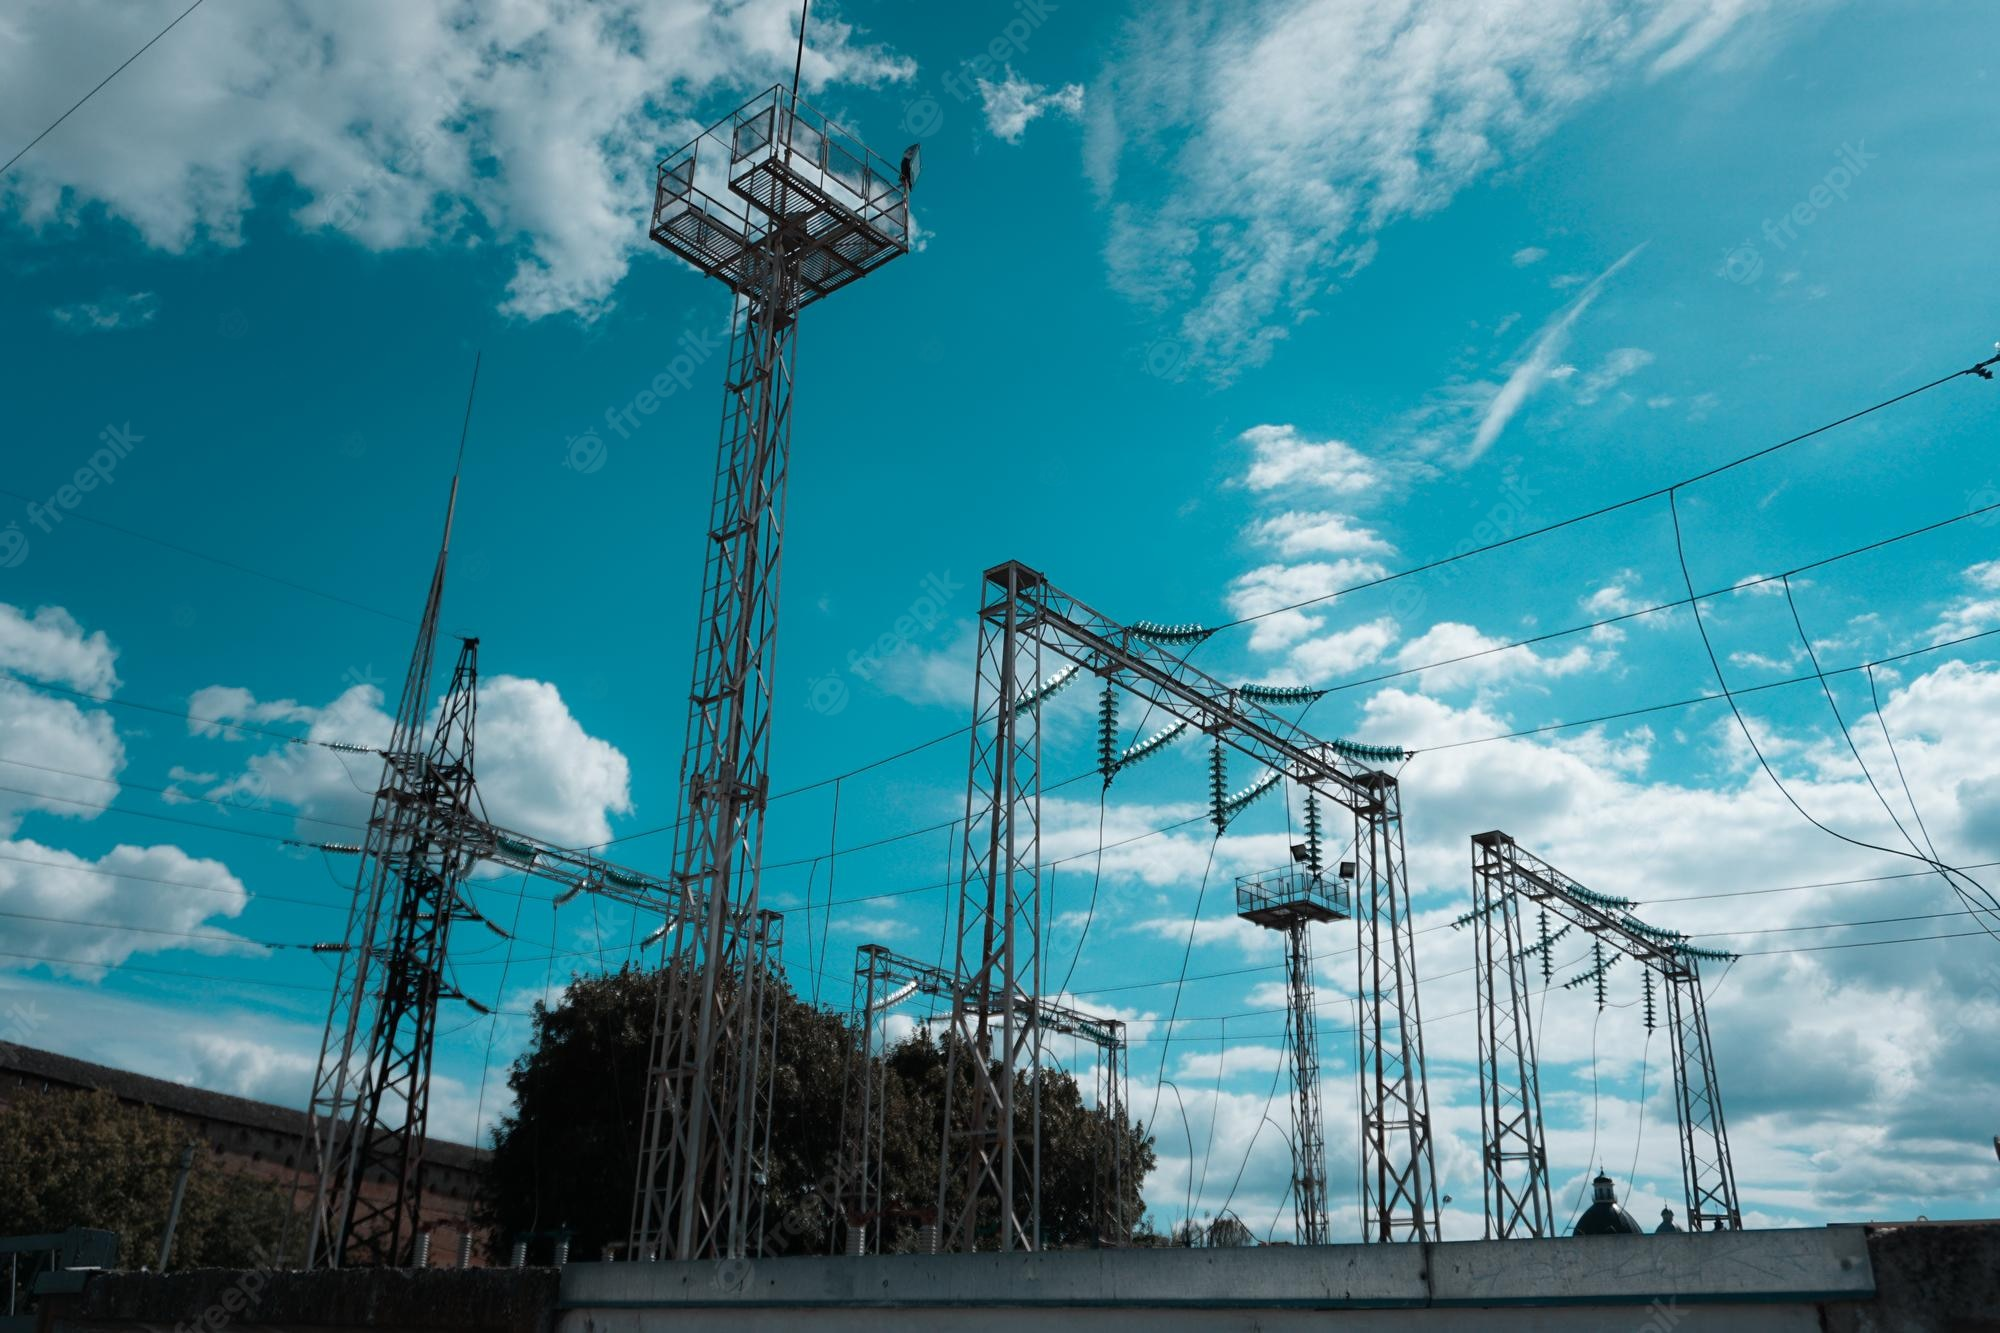



---
## Team JM2
- Vishathen Subroyalu (Team Leader)
- Nokukhanya Magagula
- Lethabo Kgathuke
- Siphesihle Ndovela
- Thembani Faleni
- Kamogelo Seoka

## Introduction

 The supply of electricity plays a large role in the livelihood of citizens in a country. Electricity, amongst other things, helps us stay connected, keep warm, and feed our families. Therefore there's a need to keep the lights on in order to maintain and improve the standard of living by investing in electricity infrastructure. However, in recent years, there has been evidence that the use of purely non-renewable sources is not sustainable.

## Problem Statement

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. 

## Objectives Of The Project
The major objectives of the project are as follows:

- analyse the supplied data;
- identify potential errors in the data and clean the existing data set;
- determine if additional features can be added to enrich the data set;
- build a model that is capable of forecasting the three hourly demand shortfalls;
- evaluate the accuracy of the best machine learning model;
- determine what features were most important in the model’s prediction decision, and
- explain the inner working of the model to a non-technical audience. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. References</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [34]:
#Importing packages

# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
from sklearn.model_selection import cross_val_score
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import random
import warnings
warnings.filterwarnings('ignore')

import pickle

#Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = np.random.seed(1)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#Loading the data

df_train = pd.read_csv('df_train.csv') 
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


We'll start by taking a brief look at the data. 

In [3]:
df_train.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [4]:
#checking the size of the train data
df_train.shape 

(8763, 49)

In [5]:
#checking the size of the test data

df_test.shape

(2920, 48)

Alright, so we can see that our dataframes are actually the same (have the same columns), except for the fact that our testing data has one less column. This is expected because the 'load_shortfall_3h' column is our target variable and it makes sense why our testing data does not have that column. Now that we're aware of that, our exploratory data analysis will be done mainly on our training data from here on.

The next step from here is to look at the data statistics.

In [6]:
# look at data statistics

df_train.describe().T #using describe().T to avoid our data being truncated

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


Now we'll be checking for both duplicated and null values.

In [7]:
# Checking duplicated values

print('train data duplicates:')
print(df_train.duplicated().sum())

train data duplicates:
0


Fortunately for us, there are no duplicated entries, so we can now move on to checking for nulls.

In [8]:
# Checking null values

df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

The data that we're dealing with is pretty much clean. We just have null values in the 'Valencia_pressure' column.

Now we'll move on to evaluating outliers.

In [9]:
df_train.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

As we know, whenever a column has high Kurtosis (>3), it indicates a large number of outliers. If we ignore the outliers, we may end up drawing the wrong conclusions. Hence, it is important for us to identify outliers to understand how to handle them.

In this case, we'll be plotting boxplots of columns that have extreme outliers.

<AxesSubplot:xlabel='Valencia_snow_3h'>

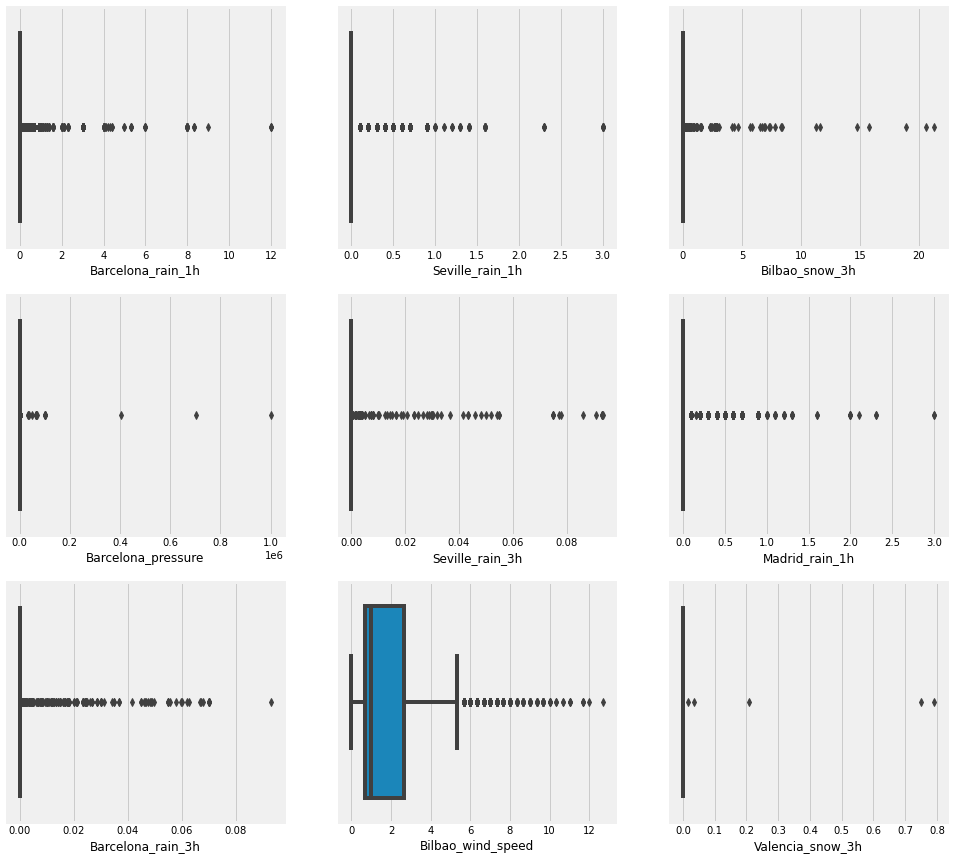

In [10]:
# plotting boxplots to understand the distribution of the data(specifically outliers)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
  
sns.boxplot(ax=axes[0, 0], data=df_train, x='Barcelona_rain_1h')
sns.boxplot(ax=axes[0, 1], data=df_train, x='Seville_rain_1h')
sns.boxplot(ax=axes[0, 2], data=df_train, x='Bilbao_snow_3h')
sns.boxplot(ax=axes[1, 0], data=df_train, x='Barcelona_pressure')
sns.boxplot(ax=axes[1, 1], data=df_train, x='Seville_rain_3h')
sns.boxplot(ax=axes[1, 2], data=df_train, x='Madrid_rain_1h')
sns.boxplot(ax=axes[2, 0], data=df_train, x='Barcelona_rain_3h')
sns.boxplot(ax=axes[2, 1], data=df_train, x='Bilbao_wind_speed')
sns.boxplot(ax=axes[2, 2], data=df_train, x='Valencia_snow_3h')

Most of our outliers in these columns are justifiable because weather is unpredictable. However, when we take a look at 'Barcelona_pressure', we notice that the outliers don't really make sense.

To get a better understanding of that column, let's analyze it further.

In [11]:
print('Barcelona_pressure mean:')
print(df_train['Barcelona_pressure'].mean())
print('Barcelona_pressure mode:')
print(df_train['Barcelona_pressure'].mode())
print('Barcelona_pressure median:')
print(df_train['Barcelona_pressure'].median())
print('Barcelona_pressure max:')
print(df_train['Barcelona_pressure'].max())

Barcelona_pressure mean:
1377.9646049678495
Barcelona_pressure mode:
0    1017.0
Name: Barcelona_pressure, dtype: float64
Barcelona_pressure median:
1018.0
Barcelona_pressure max:
1001411.0


We can clearly see that pressure of 1001411.0 cannot be a realistic measure of pressure. So we'll have to find a way to deal with similar outliers in that column.

To make our data easier to analyze, we're going to split it into common features. We have five cities and we also have different types of weather conditions in each city. So to get a closer look at the specific cities, we're going create subdataframes of the 5 cities and evaluate them seperately against time and load shortfall.

In [12]:
# splitting the dataset into cities 

df_madrid = df_train[['Madrid_humidity', 
                      'Madrid_clouds_all', 
                      'Madrid_rain_1h', 
                      'Madrid_weather_id', 
                      'Madrid_pressure', 
                      'Madrid_temp_max', 
                      'Madrid_temp', 
                      'Madrid_temp_min', 
                      'time', 
                      'load_shortfall_3h']]

df_valencia = df_train[['Valencia_wind_deg', 
                        'Valencia_wind_speed', 
                        'Valencia_snow_3h', 
                        'Valencia_pressure', 
                        'Valencia_temp_max', 
                        'Valencia_temp', 
                        'Valencia_humidity',
                        'Valencia_temp_min', 
                        'time', 
                        'load_shortfall_3h']]

df_bilbao = df_train[['Bilbao_rain_1h',
                     'Bilbao_clouds_all', 
                     'Bilbao_wind_speed', 
                      'Bilbao_wind_deg', 
                      'Bilbao_snow_3h', 
                      'Bilbao_pressure', 
                      'Bilbao_weather_id', 
                      'Bilbao_temp_min', 
                      'Bilbao_temp', 
                      'Bilbao_temp_max', 
                     'time', 
                      'load_shortfall_3h']]

df_seville = df_train[['Seville_humidity',
                       'Seville_clouds_all', 
                       'Seville_wind_speed', 
                       'Seville_pressure', 
                       'Seville_rain_1h', 
                       'Seville_rain_3h', 
                       'Seville_weather_id', 
                       'Seville_temp_max', 
                       'Seville_temp', 
                       'Seville_temp_min', 
                       'time', 
                       'load_shortfall_3h']]

df_barcelona = df_train[['Barcelona_wind_speed', 
                         'Barcelona_wind_deg', 
                         'Barcelona_rain_1h', 
                         'Barcelona_pressure', 
                         'Barcelona_rain_3h', 
                         'Barcelona_weather_id', 
                         'Barcelona_temp_max', 
                         'Barcelona_temp', 
                         'Barcelona_temp_min', 
                         'time', 
                         'load_shortfall_3h']]

Now that we've segmented our data, we will evaluate correlation in the segmented dataset.

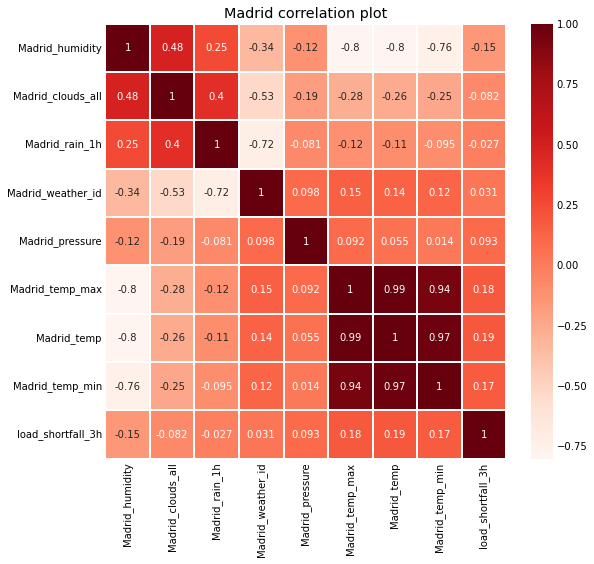

In [13]:
# evaluating correlation for Madrid
#plt.subplots(7, 5, figsize=(15, 30))
plt.figure(figsize = (8,8))
plt.title('Madrid correlation plot')
corr = df_madrid.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True,linewidths=.1,cmap="Reds")
plt.show()

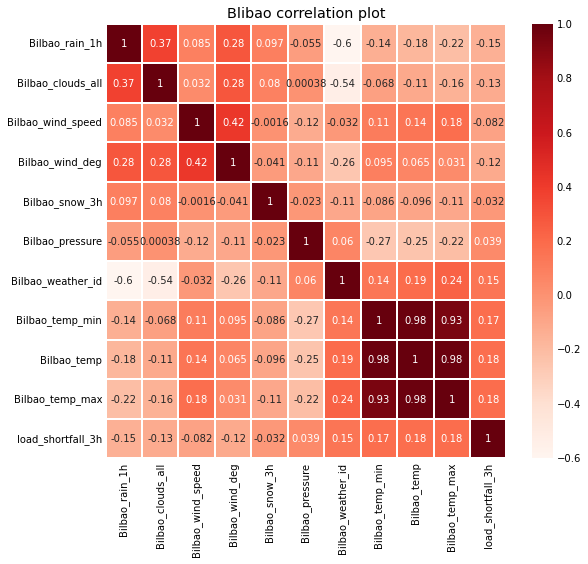

In [14]:
# evaluating correlation for Blibao
plt.figure(figsize = (8,8))
plt.title('Blibao correlation plot')
corr = df_bilbao.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True,linewidths=.1,cmap="Reds")
plt.show()

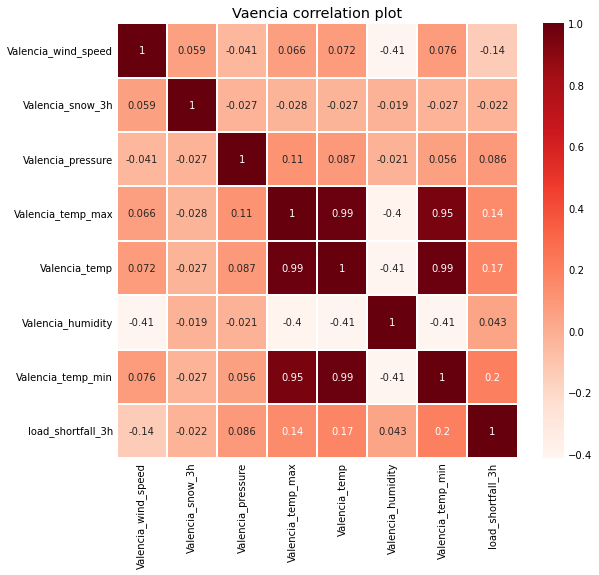

In [15]:
# evaluating correlation for Valencia
plt.figure(figsize = (8,8))
plt.title('Vaencia correlation plot')
corr = df_valencia.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True,linewidths=.1,cmap="Reds")
plt.show()

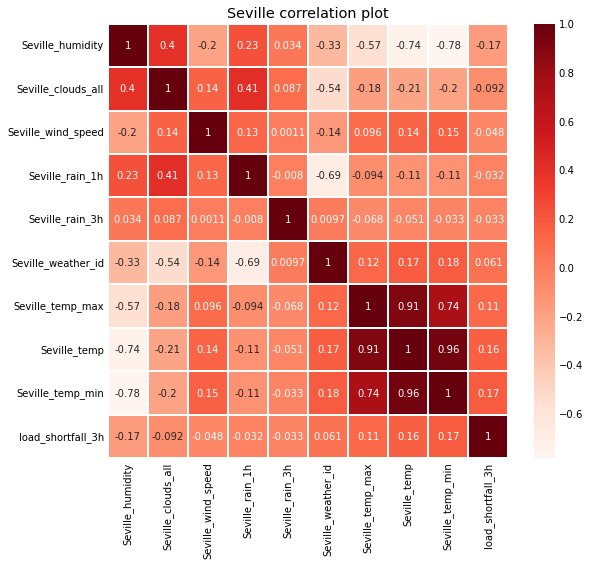

In [16]:
# evaluating correlation for Seville 
plt.figure(figsize = (8,8))
plt.title('Seville correlation plot')
corr = df_seville.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True,linewidths=.1,cmap="Reds")
plt.show()

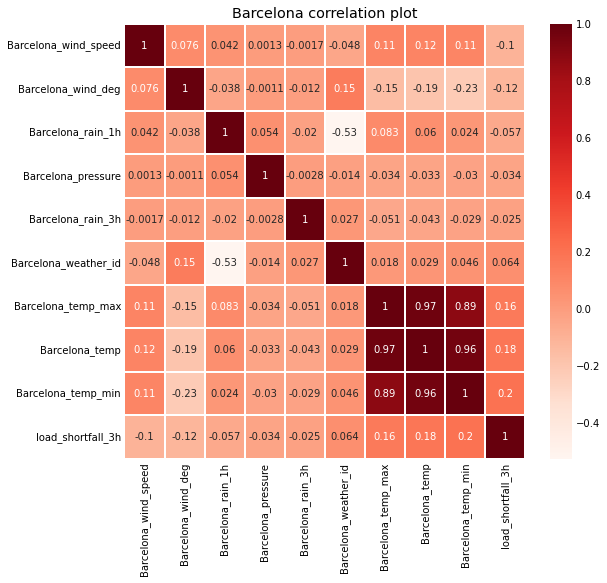

In [17]:
# evaluating correlation for Barcelona
plt.figure(figsize = (8,8))
plt.title('Barcelona correlation plot')
corr = df_barcelona.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True,linewidths=.1,cmap="Reds")
plt.show()

Now that we've evaluated correlation for each city, we can see that there's stronger correlation in the 'temp'(temperature) columns for all cities.

In [18]:
## Creating correlation matrix function to drop the highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(df_train, 0.8) 
len(set(corr_features))

13

In [20]:
corr_features

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min'}

In [21]:
correlated_features = df_train[['Barcelona_temp','Barcelona_temp_max','Barcelona_temp_min','Bilbao_temp','Bilbao_temp_max','Bilbao_temp_min','Madrid_temp','Madrid_temp_max','Madrid_temp_min','Seville_temp','Seville_temp_min','Valencia_temp','Valencia_temp_min']]
correlated_features.head(5)

,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Seville_temp,Seville_temp_min,Valencia_temp,Valencia_temp_min
0,281.013000,281.013000,281.013000,269.338615,269.338615,269.338615,265.938000,265.938000,265.938000,274.254667,274.254667,269.888000,269.888000
1,280.561667,280.561667,280.561667,270.376000,270.376000,270.376000,266.386667,266.386667,266.386667,274.945000,274.945000,271.728333,271.728333
2,281.583667,281.583667,281.583667,275.027229,275.027229,275.027229,272.708667,272.708667,272.708667,278.792000,278.792000,278.008667,278.008667
3,283.434104,283.434104,283.434104,281.135063,281.135063,281.135063,281.895219,281.895219,281.895219,285.394000,285.394000,284.899552,284.899552
4,284.213167,284.213167,284.213167,282.252063,282.252063,282.252063,280.678437,280.678437,280.678437,285.513719,285.513719,283.015115,283.015115


Now we'll create a scatterplot to view the average temperature correlation.

[Text(0.5, 1.0, 'Valencia vs Seville')]

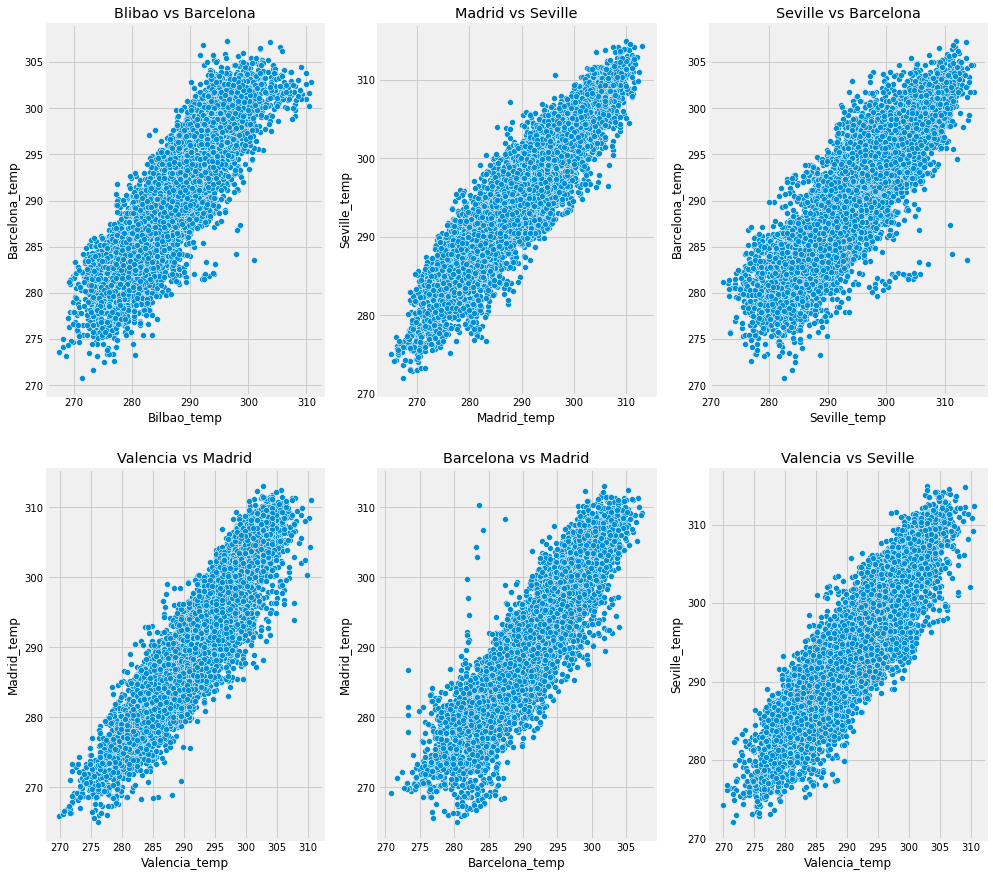

In [22]:
# plotting average temperature features with highest correlation with each other
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
sns.scatterplot(ax=axes[0, 0], x='Bilbao_temp',y='Barcelona_temp', data=correlated_features).set(title='Blibao vs Barcelona')
sns.scatterplot(ax=axes[0, 1], x='Madrid_temp',y='Seville_temp', data=correlated_features).set(title='Madrid vs Seville')
sns.scatterplot(ax=axes[0, 2], x='Seville_temp',y='Barcelona_temp', data=correlated_features).set(title='Seville vs Barcelona')
sns.scatterplot(ax=axes[1, 0], x='Valencia_temp',y='Madrid_temp', data=correlated_features).set(title='Valencia vs Madrid')
sns.scatterplot(ax=axes[1, 1], x='Barcelona_temp',y='Madrid_temp', data=correlated_features).set(title='Barcelona vs Madrid')
sns.scatterplot(ax=axes[1, 2], x='Valencia_temp',y='Seville_temp', data=correlated_features).set(title='Valencia vs Seville')

As we can see from the scatterplots above, there is high correlation between the cities' average temperatures.

Now we'll go ahead to testing normality. To do that we'll plot the 'load_shortfall_3h' as it is our target variable and if we can prove that it is normally distributed then we can conclude that the whole dataset is ditributed normally.

***Graphical Normality Test - 'load_shortfall_3h'***

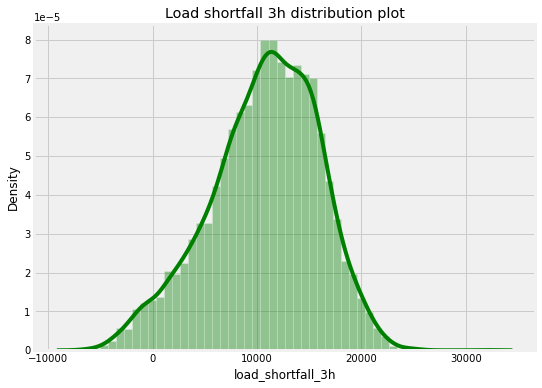

In [23]:
#plotting distribution

fig, ax = plt.subplots(1,1, figsize=(8,6)) 
plt.title('Load shortfall 3h distribution plot')
sns.distplot(a=df_train['load_shortfall_3h'], color='green',hist_kws={"edgecolor": 'white'})
plt.show()

By simply looking at this histogram, we can tell the load_shortfall_3h resembles a bell-shape and is normally distributed. This can then lead us to conclude that our dataset is distributed normally.

That wraps up our exploratory data analysis, now on to data engineering!

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

***Note:*** In the data engineering process, we will be cleaning the data and creating new features for both the train and test dataframes. To make our work easier, we'll merge the datasets.

In [24]:
# merging df_train and df_test
df_concat = pd.concat([df_train, df_test])

In [25]:
# Checking the shape of the merged data set
df_concat.shape

(11683, 49)

This new data set contain 11683 rows and 49 column including our target variable.

In [26]:
#make a copy of the df so that if we make mistakes we can always refer to the original df
df_new = df_concat.copy()

### 4.1 Dealing with null values

In [27]:
# Check for the sum and percentage of null values in each column
total_NaN = df_new.isnull().sum()
percent_NaN = round(df_new.isnull().sum()*100/len(df_new),2)
df_NaNs = pd.concat([total_NaN, percent_NaN], axis=1, keys=['Total NaN', 'Percent NaN'])
df_NaNs

,Total NaN,Percent NaN
Unnamed: 0,0,0.00
time,0,0.00
Madrid_wind_speed,0,0.00
Valencia_wind_deg,0,0.00
Bilbao_rain_1h,0,0.00
Valencia_wind_speed,0,0.00
Seville_humidity,0,0.00
Madrid_humidity,0,0.00
Bilbao_clouds_all,0,0.00
Bilbao_wind_speed,0,0.00


* Valencia_pressure has approximately 22% of missing data.
* load_shortfall_3h	 has approximately 25% of missing data but this is nothing but our target forecast.

So now that we know that our null values are only in the 'Valencia_pressure' column, we're going to do a quick analysis of that column to see if we should impute the column or remove it completely.

<AxesSubplot:xlabel='Valencia_pressure'>

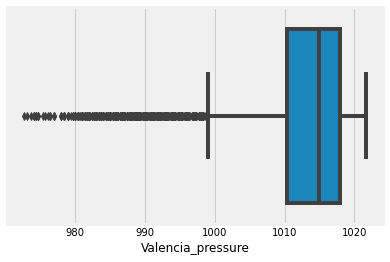

In [28]:
sns.boxplot(df_train['Valencia_pressure'])

Based on the boxplot above, we can see how our 'Valencia_pressure' column data is spread out. Now we have decided to impute the data instead of remove because we don't know yet if it will be valuable or not.

Normally, null values can be replaced with either the mean, mode or median of the specific column. Our 'Valencia_pressure' column data appears to be left-skewed. With what we know, when the data is skewed, it is good to consider using mode values for replacing the missing values. So we will replace the null values with the mode instead of the mean or median.

In [29]:
# Replacing Valencia_pressure null values with the mean

df_new['Valencia_pressure'] = df_new['Valencia_pressure'].fillna(df_new['Valencia_pressure'].mode()[0])

### 4.2 Dropping irrelevant columns

After careful evaluation of our data, we drop the 'Unnamed 0:' column because it is the same as our indexing. 

In [30]:
# Drop Unnamed: 0
df_new = df_new.drop(['Unnamed: 0'], axis = 1)

### 4.3 Evaluating data types

Based on the analysis in our EDA, we know that majory of our data is numeric. We do have some columns that are non-numeric types. Let's take a look at them.

In [31]:
df_new.select_dtypes(include=['object']).head(2)

,time,Valencia_wind_deg,Seville_pressure
0,2015-01-01 03:00:00,level_5,sp25
1,2015-01-01 06:00:00,level_10,sp25


#### 4.3.1 Valencia Wind Deg feature engineering

We can see that the data in this column is categorical and each level represents a range of degrees. There are 10 levels and 360 degrees as a measure. In order to change the values so that they match with the other columns that show wind degree, we will first extract the numerical value of the level and convert the column to a numeric data type (float specifically, to match it with the other columns). Once that is done, we will then replace the level numbers with randomised degree values.

In [32]:
# Extracting numeric values from the affected columns

df_new['Valencia_wind_deg'] = df_new['Valencia_wind_deg'].str.extract('(\d+)')

#converting the columns to numeric data types to ensure the codes don't fail silently
df_new[['Valencia_wind_deg']] = df_new[['Valencia_wind_deg']].apply(pd.to_numeric)
df_new['Valencia_wind_deg']=df_new['Valencia_wind_deg'].astype(float)

In [35]:
#Function to replace the numeric levels with randomised degree values

def g(x):
    min=0
    incre=36
    for i in range (1,11):
        if x==i : x=random.uniform(min+(i-1)*incre,min+incre*i)
    return x
df_new['Valencia_wind_deg']=df_new['Valencia_wind_deg'].apply(lambda row : g(row))

#### 4.3.2 Seville pressure feature engineering

With Seville pressure, we realised that the pressure is mesaured in millibars and as a result we decided to convert the SP levels from just 1-25 integers into measurements of millibars.

In order to do that, we had to outsource the historic data that was recorded in Spain. We found that data on [weatherspark.com](https://weatherspark.com/h/y/34152/2016/Historical-Weather-during-2016-in-Sevilla-Spain#Figures-Pressure) and looked at the minimum and maximum pressure values for the years 2015-2017. 

In [36]:
#first we extract the numeric values and then convert the column into a numeric data type

df_new['Seville_pressure'] = df_new['Seville_pressure'].str.extract('(\d+)')
df_new[['Seville_pressure']] = df_new[['Seville_pressure']].apply(pd.to_numeric)
df_new['Seville_pressure']=df_new['Seville_pressure'].astype(float)

In [37]:
#Now we have a function to convert seville pressure to millibars

max_17=30.262*33.9639 
min_17=29.613*33.9639
max_16=30.695*33.9639
min_16=29.431*33.9639
max_15=30.670*33.9639
min_15=29.472*33.9639
avg_min=(min_17+min_16+min_15)/3
avg_max=(max_17+max_16+max_15)/3
incre=(avg_max-avg_min)/25

def f(x):
    for i in range(0,26):
        if x==i: x=random.uniform(avg_min+(i-1)*incre, avg_min+i*incre)
    return round(x)

df_new["Seville_pressure"] = df_new["Seville_pressure"].apply(lambda row: f(row))

#### 4.3.3 Time feature engineering

Latsly, we deal with the time column. With the time column column, we realised that we cannot use it as it is on our models, so as a result, we have to convert it into a date time data type. Not only that, but we also decided to split the time into 'year', 'month', 'day', and 'hour'. 

In [38]:
#Turning tiime column into datetime data type

df_new['time'] = pd.to_datetime(df_new['time'])

Now that we've converted our 'time' column into datetime data type, we can focus on how to actually extract these values so that our model will be able to use them. The logical way to do this would be to create new columns that specify year, month, day, and hour. We will exclude minutes and seconds because our 'time' data has a pattern; the time indicates 3 hour intervals so we won't have any use for the minutes and seconds.

Let's add these new features to our dataframes!

In [39]:
#seperating time into day,month,year,week and hour

df_new["day"] = df_new["time"].dt.day
df_new["month"] = df_new["time"].dt.month
df_new["year"] = df_new["time"].dt.year
df_new["hour"] = df_new["time"].dt.hour
df_new["weekday"] = df_new["time"].dt.weekday

### 4.4 Creating new features

Since we're dealing with weather conditions, we decided to create a season feature. Our assumption is that specfic months have a specific effect on weather. The weather patterns are important because renewable sources mainy come from it. Seasons also occur every year making it a pattern that isn't redundant as it looks at groups of months and a natural occurance. 

In [40]:
# A varible called season was created to test for a seasonal effect
def n_season(x):
    Seasons=["Winter","Spring","Summer","Autumn"]
    if x in [12, 1, 2] : x=Seasons[0]
    else: 
        if x in [3, 4, 5] : x=Seasons[1]
        else: 
            if x in [6, 7, 8] : x=Seasons[2]
            else: x=Seasons[3]
    return str(x)
df_new["Season"]=df_new["month"].apply(lambda x: n_season(x))

In [41]:
#Dropping the time column

df_new=df_new.drop(['time'],axis=1)

In [42]:
#Creating dummies to ensure that our model can use the seasons feature
df_new=pd.get_dummies(df_new)

In [43]:
#Now we'll just take a quick look at our data to ensure that our new features have been added

df_new.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

Now that our new features have been added successfully, we'll move on to dropping columns that won't help our model to perform better. 

During the exploratory data analysis process, when we evaluated outliers, we also noticed that over 85% of the values in the 'rain', 'clouds' and 'snow' columns were zeros. Due to that finding, we decided to drop those columns for our modeling phase. 

The other columns that we'll drop, will be the 'weather_id', 'temp_min' and temp_max' columns. The 'weather_id' column doesn't have valuable information in relation to our target variable. When it comes to the 'temp_min' and 'temp_max' columns, the values are mostly the same as the average temperature column because they are measured at the same time. Therefore, they are redundant.

In [44]:
#Dropping columns to help our model perform better. 

df_new = df_new.drop(['Bilbao_rain_1h', 
                      'Bilbao_clouds_all', 
                      'Seville_clouds_all', 
                      'Madrid_clouds_all', 
                      'Barcelona_rain_1h', 
                      'Seville_rain_1h', 
                      'Bilbao_snow_3h', 
                      'Seville_rain_3h', 
                      'Madrid_rain_1h', 
                      'Barcelona_rain_3h', 
                      'Valencia_snow_3h', 
                      'Madrid_weather_id', 
                      'Barcelona_weather_id', 
                      'Seville_weather_id', 
                      'Bilbao_weather_id', 
                      'Barcelona_temp_max',
                      'Barcelona_temp_min',
                      'Bilbao_temp_max',
                      'Bilbao_temp_min',
                      'Madrid_temp_max',
                      'Madrid_temp_min', 
                      'Seville_temp_min', 
                      'Valencia_temp_min'], axis=1)

In [45]:
#Now we'll just take a quick look at our data to ensure that our new features have been added

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     11683 non-null  float64
 1   Valencia_wind_deg     11683 non-null  float64
 2   Valencia_wind_speed   11683 non-null  float64
 3   Seville_humidity      11683 non-null  float64
 4   Madrid_humidity       11683 non-null  float64
 5   Bilbao_wind_speed     11683 non-null  float64
 6   Bilbao_wind_deg       11683 non-null  float64
 7   Barcelona_wind_speed  11683 non-null  float64
 8   Barcelona_wind_deg    11683 non-null  float64
 9   Seville_wind_speed    11683 non-null  float64
 10  Seville_pressure      11683 non-null  int64  
 11  Barcelona_pressure    11683 non-null  float64
 12  Bilbao_pressure       11683 non-null  float64
 13  Valencia_pressure     11683 non-null  float64
 14  Seville_temp_max      11683 non-null  float64
 15  Madrid_pressure     

In [46]:
# Reorder columns so that our response variable is the last column of the dataframe
column_titles = [col for col in df_new.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df_new = df_new.reindex(columns=column_titles)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

We have chosen to create 3 models, namely: 


1) Linear Regression Model 

2) Decision Trees Model

3) Random Forest Model

### 5.1 Splitting the data

We'll start by splitting the data, standardizing the data and setting parameters. 

In [47]:
# split data
y = df_new[:len(df_train)][['load_shortfall_3h']]
X = df_new[:len(df_train)].drop('load_shortfall_3h',axis=1)
# Ignore for now
x_train = df_new[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_new[len(df_train):].drop('load_shortfall_3h',axis=1)

In [48]:
#standardising the data
scaler = StandardScaler()
X_transformed=scaler.fit_transform(X)

In [49]:
# Split the data into training and testing test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25) 

### 5.2 Defining models

Here we'll be defining our 3 models.

In [50]:
# Linear Regression
L_reg = LinearRegression()
L_reg.fit(X_train, y_train)

LinearRegression()

In [51]:
D_Tree = DecisionTreeRegressor(max_depth=6,random_state=0)
D_Tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [52]:
R_F = RandomForestRegressor(n_estimators=500, random_state=0)
R_F.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

We will evaluate our models using Root Mean Square Error (RMSE) and Coefficient of Determination (R^2)

In [53]:
# Compare model performance

# Make training set predictions for each model
y_pred_lin_train = L_reg.predict(X_train)
y_pred_DT_train = D_Tree.predict(X_train)
y_pred_RF_train = R_F.predict(X_train)

# Make test set predictions for each model
y_pred_lin_test = L_reg.predict(X_test)
y_pred_DT_test = D_Tree.predict(X_test)
y_pred_RF_test = R_F.predict(X_test)

# Dictionary of results
metrics_dict = {'Training RMSE':{
                        "Linear Regression":metrics.mean_squared_error(y_train, y_pred_lin_train,squared=False),
                        "Decision Tree": metrics.mean_squared_error(y_train, y_pred_DT_train,squared=False),
                        "Random Forest": metrics.mean_squared_error(y_train, y_pred_RF_train,squared=False)
                },
                'Test RMSE':{
                        "Linear Regression": metrics.mean_squared_error(y_test, y_pred_lin_test,squared=False),
                        "Decision Tree": metrics.mean_squared_error(y_test,  y_pred_DT_test,squared=False),
                        "Random Forest": metrics.mean_squared_error(y_test, y_pred_RF_test,squared=False)
                },
                'Train R^2':{
                        "Linear Regression":metrics.r2_score(y_train, y_pred_lin_train),
                        "Decision Tree":metrics.r2_score(y_train, y_pred_DT_train),
                        "Random Forest":metrics.r2_score(y_train,y_pred_RF_train)
                    
                },
                'Test R^2':{
                        "Linear Regression":metrics.r2_score(y_test, y_pred_lin_test),
                        "Decision Tree":metrics.r2_score(y_test,y_pred_DT_test),
                        "Random Forest":metrics.r2_score(y_test,y_pred_RF_test)}
                }
output=pd.DataFrame(metrics_dict)

output

,Training RMSE,Test RMSE,Train R^2,Test R^2
Linear Regression,4680.238887,4587.796210,0.203492,0.202639
Decision Tree,3657.547900,3754.630256,0.513555,0.465951
Random Forest,1042.054410,2675.472726,0.960515,0.728826


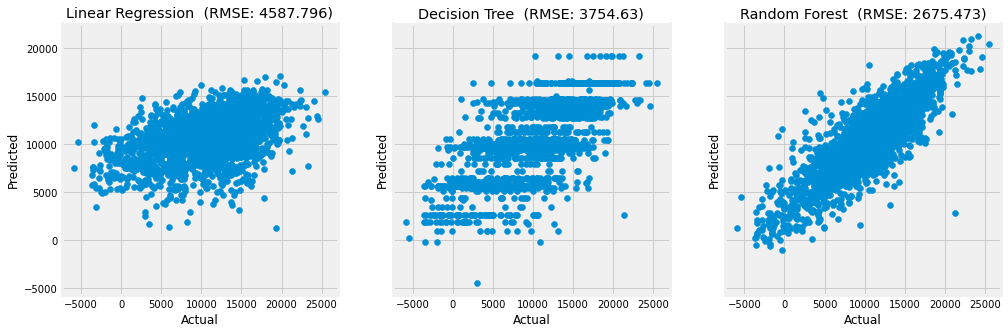

In [61]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [L_reg.predict(X_test), D_Tree.predict(X_test), R_F.predict(X_test)]
title = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Loop through all axes to plot each models' results 
for i in range(3):
    rmse = round(np.sqrt(metrics.mean_squared_error(pred[i],y_test)),3)
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    #ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

From the above plot results it is pretty clear that the random forest model performs better than the other two models we created. The random forest model is ideal in this case because our data consists of a lot of outliers (which is only normal because weather is unpredictable and has a large range). 

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

It is clear that the Random Forest Regression Model is ideal in this case. What's great about it is that it generalizes predictions much better than Decision Trees. Not only that, but it also performs great on many problems, which in our case, was features with non-linear relationships such as pressure, temperature, etc. The random forest model worked for us in this case because our data consists of a lot of outliers (which is only normal because weather is unpredictable and has a large range).

Let's deep dive into what a random forest model is and how it works.

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

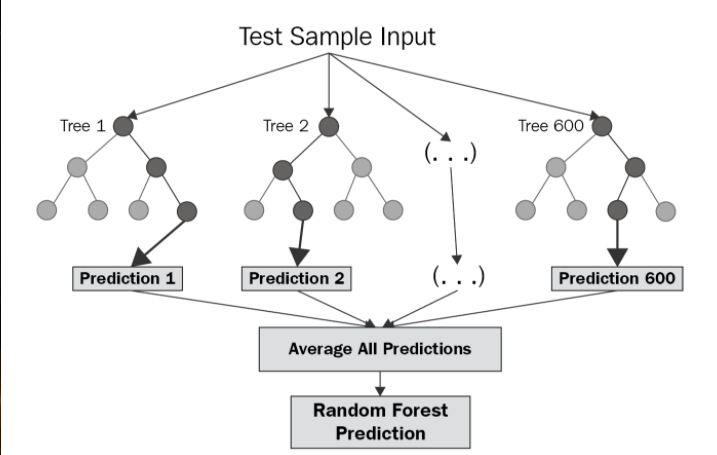

The diagram above shows the structure of a Random Forest. You can notice that the trees run in parallel with no interaction amongst them. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

We can see that our Random Forest Regression model made the most accurate predictions thus far with an improvement from the other 2 models. 

<a id="eight"></a>
## 8. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


- LevelUp Coding - (https://levelup.gitconnected.com/random-forest-regression-209c0f354c84)
- Weather's Park - (https://weatherspark.com/h/y/34152/2016/Historical-Weather-during-2016-in-Sevilla-Spain#Figures-Pressure)
- Paradise Energy Solutions - (https://www.paradisesolarenergy.com/blog/how-does-weather-affect-solar-panels)
